# Week 3-4 Pandas Homework (Gregory Terrinoni)

*The below code analyzes various investment returns across multiple strategies/funds and compares their performance.*

 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [44]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [45]:
# Reading whale returns
whale_returns_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date")
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [46]:
# Counting nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [47]:
# Dropping nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [48]:
# Reading algorithmic returns
algo_returns_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date")
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [49]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [50]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [51]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\sp500_history.csv')
sp500_returns = pd.read_csv(sp500_history_csv, parse_dates= ["Date"])
# Converting date to match date format from whale and algo returns data
sp500_returns["Date"] = sp500_returns["Date"].dt.strftime('%Y-%m-%d')
# Setting index to date and sorting to match whale and algo returns
sp500_returns = sp500_returns.set_index("Date")
sp500_returns = sp500_returns.sort_index()
sp500_returns

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [52]:
# Checking data types
sp500_returns.dtypes

Close    object
dtype: object

In [53]:
# Fixing data types
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "")
sp500_returns["Close"] = sp500_returns["Close"].astype("float")
sp500_returns.dtypes

Close    float64
dtype: object

In [54]:
# Calculating daily spx returns
sp500_returns = sp500_returns.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [55]:
# Dropping nulls
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [56]:
# Renaming columns
sp500_returns = sp500_returns.rename(columns = {"Close": "S&P 500"})
sp500_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [57]:
# Concatenating all DataFrames into a single DataFrame
combined_pfo = pd.concat([whale_returns, algo_returns, sp500_returns], axis= "columns", join="inner" )
combined_pfo

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

*Summary*: **Algo 1** and **Berkshire Hathaway** both outperform the *S&P 500* during this time frame.

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date', ylabel='% Return'>

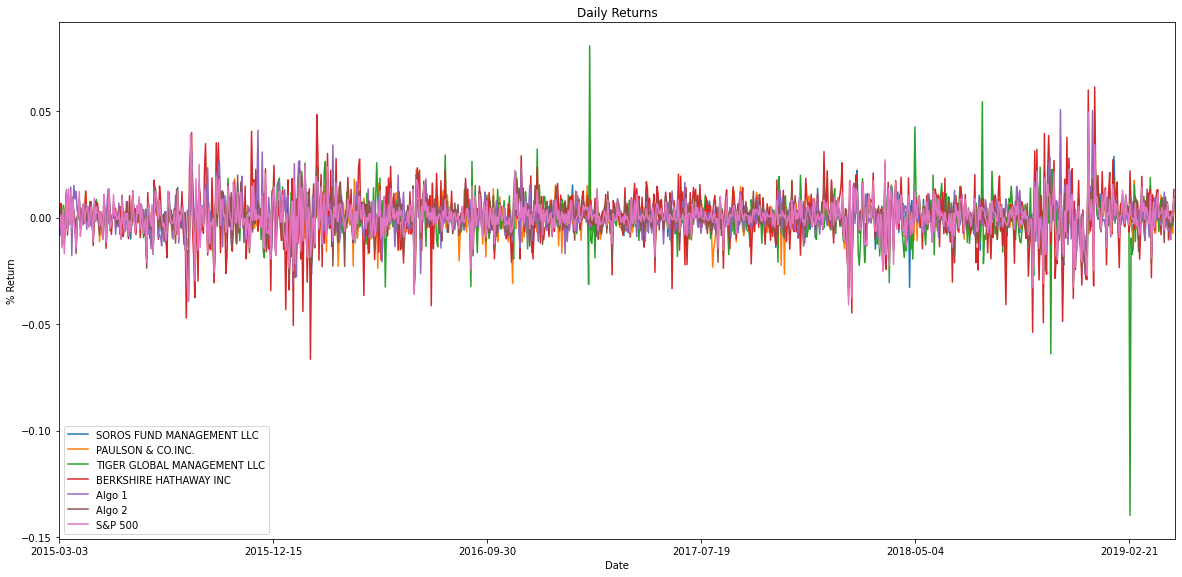

In [58]:
# Creating a variable to set the length of the x-axis
combined_count = combined_pfo.count()
# Plotting daily returns
combined_pfo.plot(title="Daily Returns", ylabel="% Return", xlim=(0,combined_count[0]), figsize=(20,9.5))

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

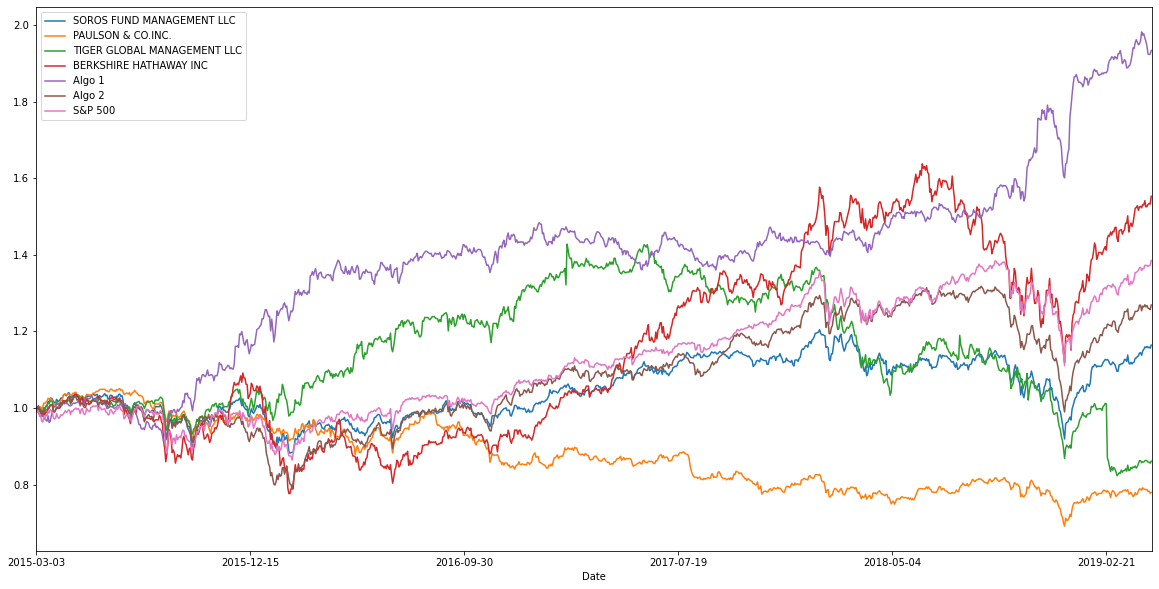

In [59]:
# Calculating cumulative returns
cumulative_returns = (1 + combined_pfo).cumprod()
# Creating a variable to set the length of the x-axis
cumulative_returns_count = cumulative_returns.count()
# Plotting cumulative returns
cumulative_returns.plot(xlim=(0,cumulative_returns_count[0]), figsize = (20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

*Summary*:  
- **Tiger Global** has the *largest spread* and **Paulson & Co** has the *smallest spread*
- **Tiger Global** and **Berkshire Hathaway** are both riskier than the *S&P*.

<AxesSubplot:title={'center':'Portfolio Risk'}, ylabel='Daily Return %'>

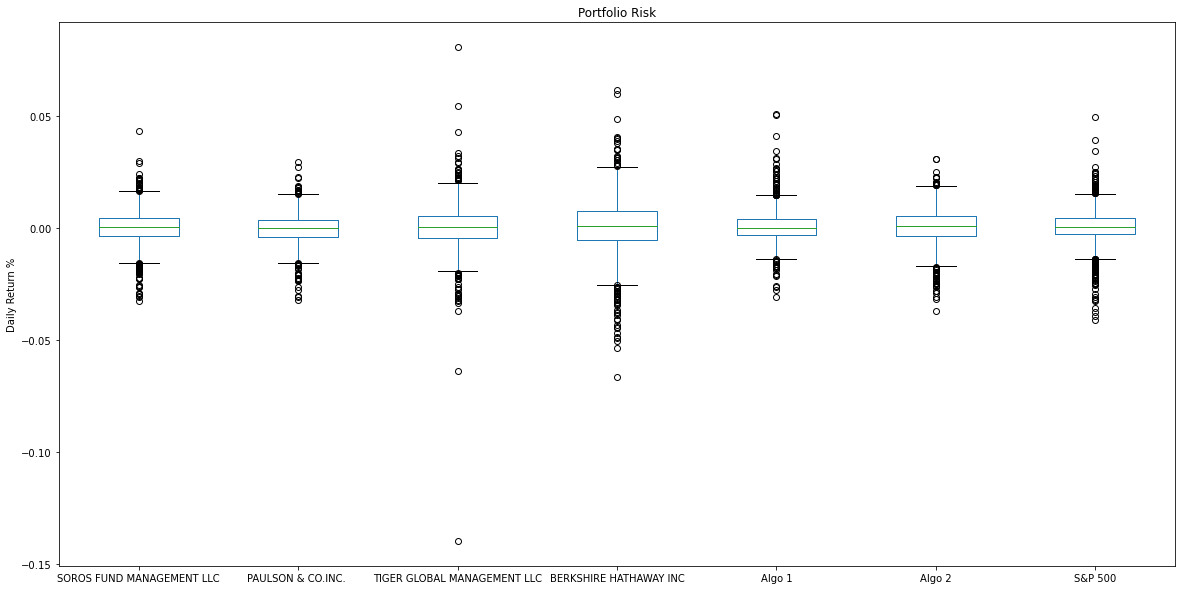

In [60]:
# Box plot to visually show risk
combined_pfo.plot.box(title="Portfolio Risk", ylabel= "Daily Return %", figsize=(20,10))

In [61]:
# Calculating the standard deviation for each portfolio. 
daily_std = combined_pfo.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [62]:
# Determining which portfolios are riskier than the S&P 500
daily_std.gt(daily_std.loc["S&P 500"])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [63]:
# Calculating the annualized standard deviation (using 252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

*Summary*:  
- In general, the risk of each pfo increases as the risk of the S&P increases
- **Algo 2** and **Soros** most closely mimic the S&P
- Based on a rolling 45-day beta window, Algo 1 *doesn't* seem that sensitive to movements in the S&P. 

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

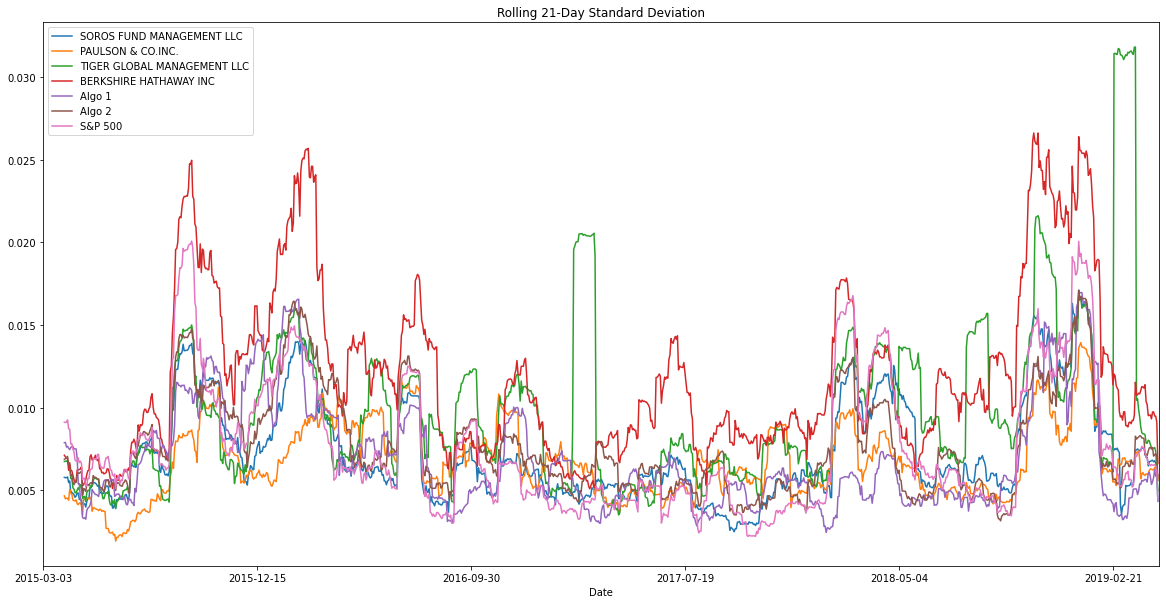

In [64]:
# Calculating and plotting the rolling standard deviation for the S&P 500 and whale portfolios (21 Day Trading Window)
combined_pfo.rolling(window=21).std().plot(title="Rolling 21-Day Standard Deviation", xlim=(0,combined_count[0]), figsize=(20,10))

In [65]:
# Constructing a correlation table
correlation = combined_pfo.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


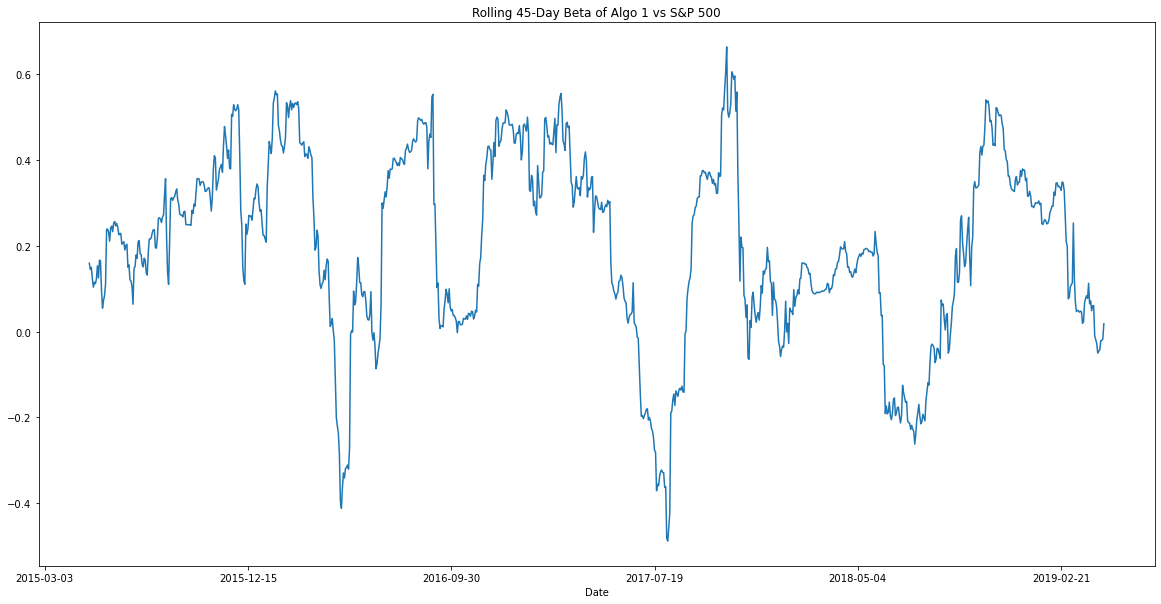

In [66]:
# Calculating Beta for a single portfolio compared to the total market (S&P 500)
# The below code is dynamic.  You can change the window, benchmark, and comparison pfo from the variables to quickly compare different strategies
beta_window = 45
comparison_pfo = "Algo 1"
benchmark = "S&P 500"
rolling_beta = (combined_pfo[comparison_pfo].rolling(window=beta_window).cov(combined_pfo[benchmark]) / combined_pfo[benchmark].rolling(window=beta_window).var()).plot(figsize=(20,10), title=f"Rolling {beta_window}-Day Beta of {comparison_pfo} vs {benchmark}")

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

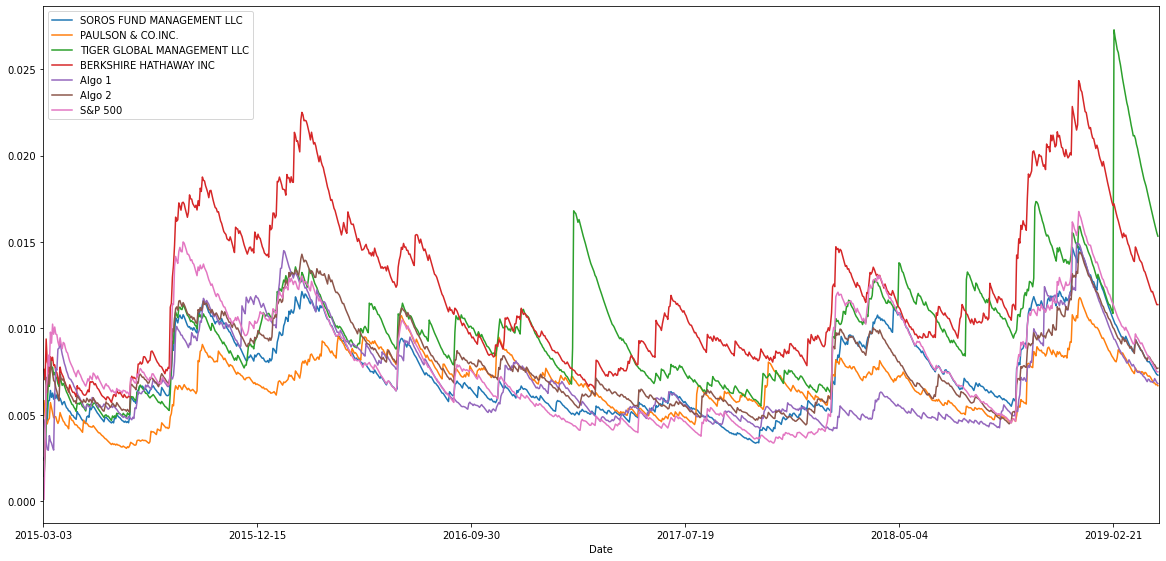

In [67]:
# Calculating a rolling window using the exponentially weighted moving average. 
combined_ewm = combined_pfo.ewm(halflife=21).std()
combined_ewm.plot(xlim=(0,combined_count[0]),figsize=(20,9.5))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [68]:
# Calculating annualized Sharpe Ratios
sharpe_ratios = (combined_pfo.mean() * 252) / (combined_pfo.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

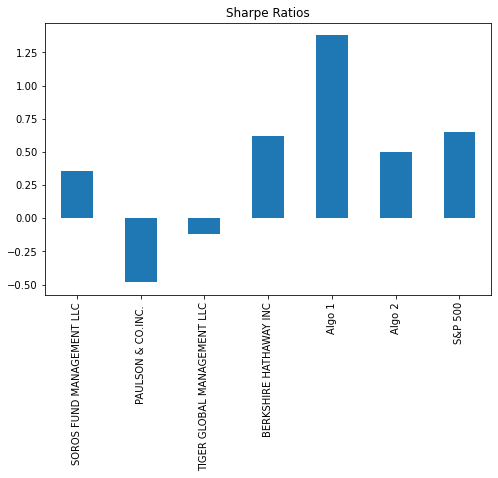

In [69]:
# Visualizing the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios', figsize=(8,5))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 

Based on sharpe ratio Algo 1 ***outperforms*** all the whales ***and*** the benchmark.  Algo 2 outperforms all whales ***except*** Berkshire Hathaway and ***underperforms*** the benchmark.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [70]:
# Reading and setting columns for first stock (BABA)
baba_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\BABA.csv')
baba_prices = pd.read_csv(baba_csv)
baba_prices["Symbol"] = "BABA"
baba_prices = baba_prices[["Date", "Symbol", "Close"]]
baba_prices

,Date,Symbol,Close
0,2015-10-01,BABA,58.87
1,2015-10-02,BABA,63.20
2,2015-10-05,BABA,63.93
3,2015-10-06,BABA,63.92
4,2015-10-07,BABA,66.28
...,...,...,...
1064,2019-12-23,BABA,214.83
1065,2019-12-24,BABA,214.26
1066,2019-12-26,BABA,216.38
1067,2019-12-27,BABA,215.47


In [71]:
# Reading and setting columns for second stock (JNJ)
jnj_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\JNJ.csv')
jnj_prices = pd.read_csv(jnj_csv)
jnj_prices["Symbol"] = "JNJ"
jnj_prices = jnj_prices[["Date", "Symbol", "Close"]]
jnj_prices

,Date,Symbol,Close
0,2015-10-01,JNJ,93.17
1,2015-10-02,JNJ,93.93
2,2015-10-05,JNJ,94.76
3,2015-10-06,JNJ,93.42
4,2015-10-07,JNJ,94.98
...,...,...,...
1064,2019-12-23,JNJ,146.44
1065,2019-12-24,JNJ,145.93
1066,2019-12-26,JNJ,145.83
1067,2019-12-27,JNJ,145.75


In [72]:
# Reading and setting columns for third stock (HLT)
hlt_csv = Path('C:\\Users\\grego\\Desktop\\Homework\\A-Whale-off-the-Portfolio\\HLT.csv')
hlt_prices = pd.read_csv(hlt_csv)
hlt_prices["Symbol"] = "HLT"
hlt_prices = hlt_prices[["Date", "Symbol", "Close"]]
hlt_prices

,Date,Symbol,Close
0,2015-10-01,HLT,49.71
1,2015-10-02,HLT,49.92
2,2015-10-05,HLT,50.73
3,2015-10-06,HLT,50.37
4,2015-10-07,HLT,51.25
...,...,...,...
1064,2019-12-23,HLT,111.28
1065,2019-12-24,HLT,111.37
1066,2019-12-26,HLT,111.94
1067,2019-12-27,HLT,112.39


In [73]:
# Concatenating all stocks into a single DataFrame
custom_pfo_combined = pd.concat([baba_prices, jnj_prices, hlt_prices], axis="rows", join="inner")
custom_pfo_combined

,Date,Symbol,Close
0,2015-10-01,BABA,58.87
1,2015-10-02,BABA,63.20
2,2015-10-05,BABA,63.93
3,2015-10-06,BABA,63.92
4,2015-10-07,BABA,66.28
...,...,...,...
1064,2019-12-23,HLT,111.28
1065,2019-12-24,HLT,111.37
1066,2019-12-26,HLT,111.94
1067,2019-12-27,HLT,112.39


In [74]:
# Resetting the index
custom_pfo_combined = custom_pfo_combined.set_index("Date")

In [75]:
# Pivoting so that each column of prices represents a unique symbol
custom_pfo_combined = custom_pfo_combined.pivot(columns="Symbol", values="Close")
custom_pfo_combined

Symbol,BABA,HLT,JNJ
Date,,,
2015-10-01,58.87,49.71,93.17
2015-10-02,63.20,49.92,93.93
2015-10-05,63.93,50.73,94.76
2015-10-06,63.92,50.37,93.42
2015-10-07,66.28,51.25,94.98
...,...,...,...
2019-12-23,214.83,111.28,146.44
2019-12-24,214.26,111.37,145.93
2019-12-26,216.38,111.94,145.83


In [76]:
# Dropping Nulls
custom_pfo_combined= custom_pfo_combined.dropna()
custom_pfo_combined.isnull().sum()

Symbol
BABA    0
HLT     0
JNJ     0
dtype: int64

In [77]:
# Calculating Percentage Returns
custom_pfo_returns = custom_pfo_combined.pct_change().drop(custom_pfo_combined.index[0])
custom_pfo_returns

Symbol,BABA,HLT,JNJ
Date,,,
2015-10-02,0.073552,0.004225,0.008157
2015-10-05,0.011551,0.016226,0.008836
2015-10-06,-0.000156,-0.007096,-0.014141
2015-10-07,0.036921,0.017471,0.016699
2015-10-08,0.021424,0.028098,0.001053
...,...,...,...
2019-12-23,0.012155,-0.001257,0.002602
2019-12-24,-0.002653,0.000809,-0.003483
2019-12-26,0.009895,0.005118,-0.000685


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [78]:
# Calculating weighted portfolio returns
weights = [1/3, 1/3, 1/3]
custom_weighted_return = custom_pfo_returns.dot(weights)
custom_weighted_return

Date
2015-10-02    0.028645
2015-10-05    0.012204
2015-10-06   -0.007131
2015-10-07    0.023697
2015-10-08    0.016858
                ...   
2019-12-23    0.004500
2019-12-24   -0.001776
2019-12-26    0.004776
2019-12-27   -0.000245
2019-12-30   -0.008015
Length: 1068, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [79]:
# Adding custom portfolio to the larger dataframe of fund returns
super_pfo = pd.concat([combined_pfo, custom_weighted_return], axis="columns", join="inner")
# Setting custom column
super_pfo.rename(columns = {0:"Custom"}, inplace = True)
super_pfo

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-10-02,0.017718,0.014584,0.009093,0.035105,0.025402,0.013144,0.014315,0.028645
2015-10-05,0.016286,-0.000020,0.015565,0.012318,0.026381,0.019278,0.018290,0.012204
2015-10-06,0.000812,-0.000969,-0.005172,-0.016468,-0.003480,0.000534,-0.003588,-0.007131
2015-10-07,0.010538,0.000653,0.008996,0.005766,0.006418,0.012416,0.008036,0.023697
2015-10-08,0.006026,0.006220,0.003262,0.011985,-0.013654,0.012447,0.008818,0.016858
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008521
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.002909
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.005504


In [80]:
# Dropping NaNs so we only compare dates where return data exists for all the stocks
super_pfo = super_pfo.dropna()
super_pfo.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [81]:
# Calculating standard deviation for super portfolio
super_pfo_std = super_pfo.std()
super_pfo_std

SOROS FUND MANAGEMENT LLC      0.007885
PAULSON & CO.INC.              0.007208
TIGER GLOBAL MANAGEMENT LLC    0.011313
BERKSHIRE HATHAWAY INC         0.013044
Algo 1                         0.007591
Algo 2                         0.008330
S&P 500                        0.008257
Custom                         0.011020
dtype: float64

C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

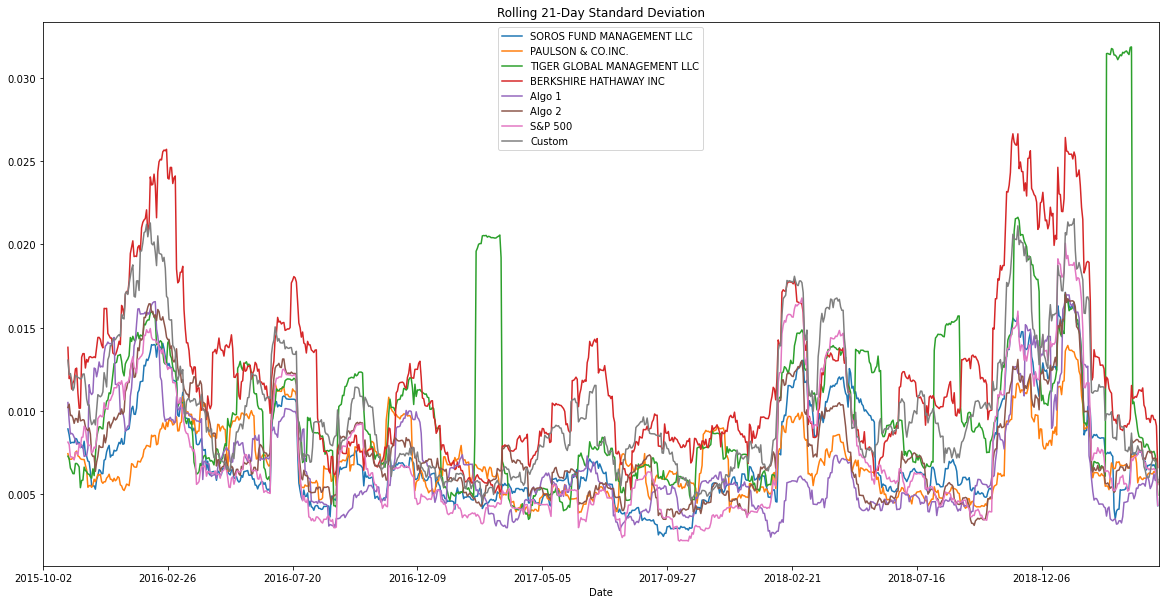

In [82]:
# Plotting rolling standard deviation for super portfolio (21-Day Window)
# Creating a variable to set the length of the x-axis
window_size_count = super_pfo.count()
super_pfo.rolling(window=21).std().plot(title="Rolling 21-Day Standard Deviation", xlim=(0,window_size_count[0]), figsize=(20,10))

In [83]:
# Calculating annualized Sharpe Ratios
super_sharpe_ratios = (super_pfo.mean() * 252) / (super_pfo.std() * np.sqrt(252))
super_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.598468
PAULSON & CO.INC.             -0.409212
TIGER GLOBAL MANAGEMENT LLC   -0.057152
BERKSHIRE HATHAWAY INC         0.841746
Algo 1                         1.551460
Algo 2                         0.750092
S&P 500                        0.973252
Custom                         1.319291
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

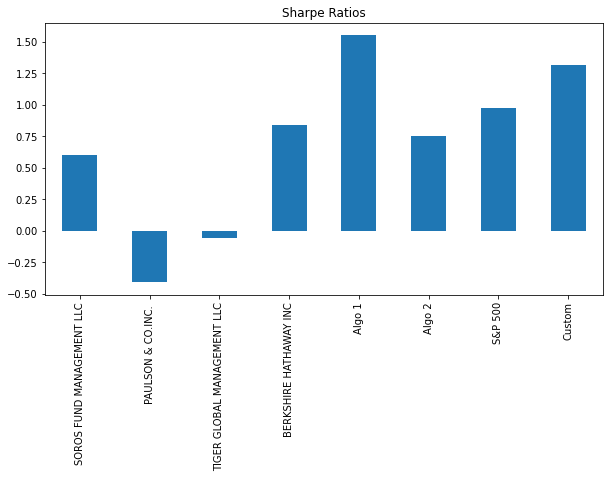

In [84]:
# Visualizing the sharpe ratios as a bar plot
super_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(10,5))

In [85]:
# Creating a correlation table
super_correlation = super_pfo.corr()
super_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.683155,0.527552,0.747808,0.297947,0.818327,0.829952,0.687167
PAULSON & CO.INC.,0.683155,1.000000,0.403006,0.527829,0.253936,0.666487,0.662835,0.546733
TIGER GLOBAL MANAGEMENT LLC,0.527552,0.403006,1.000000,0.391662,0.151019,0.468584,0.589127,0.424371
BERKSHIRE HATHAWAY INC,0.747808,0.527829,0.391662,1.000000,0.270623,0.675663,0.755506,0.731190
Algo 1,0.297947,0.253936,0.151019,0.270623,1.000000,0.281916,0.270719,0.233565
Algo 2,0.818327,0.666487,0.468584,0.675663,0.281916,1.000000,0.857237,0.700492
S&P 500,0.829952,0.662835,0.589127,0.755506,0.270719,0.857237,1.000000,0.779103
Custom,0.687167,0.546733,0.424371,0.731190,0.233565,0.700492,0.779103,1.000000


C:\Users\grego\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


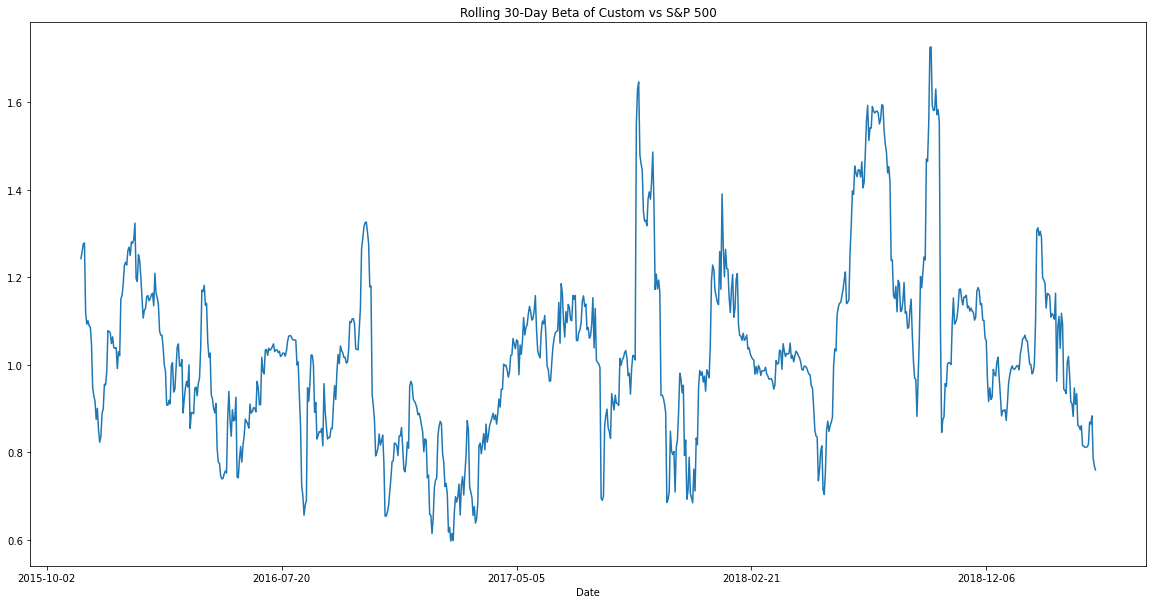

In [86]:
# Comparing beta of custom pfo vs spx
beta_window_super = 30
comparison_pfo_super = "Custom"
benchmark_super = "S&P 500"
rolling_beta_super = (super_pfo[comparison_pfo_super].rolling(window=beta_window_super).cov(super_pfo[benchmark_super]) / super_pfo[benchmark_super].rolling(window=beta_window_super).var()).plot(figsize=(20,10), title=f"Rolling {beta_window_super}-Day Beta of {comparison_pfo_super} vs {benchmark_super}")

***Custom Portfolio Summary***

My custom pfo of 3 stocks *outperforms* the S&P and every other portfolio *except* for Algo 1 and not suprisingly has a higher sharpe ratio than every other pfo *besides* Algo 1.  It is most correlated to the S&P (which makes logical sense as it comprised of 3 stocks, 2 of which are in the S&P index) and has a strong beta to the S&P as well.